In [8]:
%%capture
#importing the notebook where we had done preprocessing
%run C:/Users/admin/Desktop/EeD/Python/Project/Preprocessing.ipynb

In [9]:
%%capture
#importing the notebook where we had done EDA
%run C:/Users/admin/Desktop/EeD/Python/Project/Exploratory_Data_Analysis.ipynb

In [10]:
#using only those features in regression analysis whcih we have selected in EDA
imp_features = impfeatures_int + impfeatures_char
train_X = train_X[imp_features]
val_X = val_X[imp_features]
#one hot encoding the character variables
train_X = pd.get_dummies(train_X)
val_X = pd.get_dummies(val_X) 

In [11]:
trainxcols = train_X.columns.tolist()
valxcols = val_X.columns.tolist()
#if number of columns in train and test dataset are not same, there will be error
diff = list(set(trainxcols) - set(valxcols))
print(diff)


['HeatingQC_Po']


In [13]:
#val_X['GarageType_2Types'] = 0
val_X['HeatingQC_Po'] = 0
#val_X['Neighborhood_Blueste'] = 0

In [14]:
#ensuring that the number of columns in train and test dataset are same
trainxcols = train_X.columns.tolist()
valxcols = val_X.columns.tolist()
diff = list(set(trainxcols) - set(valxcols))
print(diff)


[]


In [15]:
#creating a custom function which returns mean absolute error 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, scoring = 'neg_mean_absolute_error').mean()

In [16]:
#Creating Linear Regression Model
#importing necessary modules from sci-kit learn
from sklearn import linear_model as lm1
from sklearn import metrics
lm = lm1.LinearRegression()

#fitting the multiple linear regression model
lm.fit(train_X, train_y)

#making predictions on the testing & test set
y_train_pred = lm.predict(train_X)
y_test_pred = lm.predict(val_X)

#printing the results
print("Train MSE: ", metrics.mean_absolute_error(train_y, y_train_pred))
print("Train RMSE: ", metrics.mean_squared_error(train_y, y_train_pred))
print("Train R2 Score: ", metrics.r2_score(train_y,y_train_pred))
print("Test MSE: ", metrics.mean_absolute_error(val_y, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(val_y, y_test_pred)))
print("Test R2 Score: ", metrics.r2_score(val_y,y_test_pred))

print(get_mae(train_X, train_y))
print(get_mae(val_X, val_y))

Train MSE:  20798.6684045
Train RMSE:  1121027458.28
Train R2 Score:  0.816975681691
Test MSE:  21637.6286615
Test RMSE:  35549.6425343
Test R2 Score:  0.817896931962
19932.3081721
22006.3660699


In [18]:
#Creating ElasticNet Regression Model
en = linear_model.ElasticNet(alpha = 0.01, l1_ratio = 0.8)
en.fit(train_X, train_y)

#making predictions on train and test set
y_train_pred4 = en.predict(train_X)
y_test_pred4 = en.predict(val_X)

#printing the results
print("Train MSE: ", metrics.mean_absolute_error(train_y, y_train_pred4))
print("Train RMSE: ", metrics.mean_squared_error(train_y, y_train_pred4))
print("Train R2 Score: ", metrics.r2_score(train_y,y_train_pred4))
print("Test MSE: ", metrics.mean_absolute_error(val_y, y_test_pred4))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(val_y, y_test_pred4)))
print("Test R2 Score: ", metrics.r2_score(val_y,y_test_pred4))


Train MSE:  20778.4783753
Train RMSE:  1121507510.52
Train R2 Score:  0.81689730606
Test MSE:  20235.5264777
Test RMSE:  34567.6770926
Test R2 Score:  0.827818225439


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [22]:
%%capture
#creating a dataset consisting of test and train scores as columns with alpha bring constant to find optimum l1_ratio
score_train = []
score_val =[]
l1 = []
for x in np.arange(0.0, 1.0, 0.01):
    en = linear_model.ElasticNet(alpha = 0.01, l1_ratio = x)
    en.fit(train_X, train_y)
    y_train_pred4 = en.predict(train_X)
    y_test_pred4 = en.predict(val_X)
    l1.append(x)
    score_train.append(metrics.r2_score(train_y,y_train_pred4))
    score_val.append(metrics.r2_score(val_y,y_test_pred4))

df = {'l1_ratio':l1,'train_scores':score_train,'test_scores':score_val}
l1_scores = pd.DataFrame(data = df)

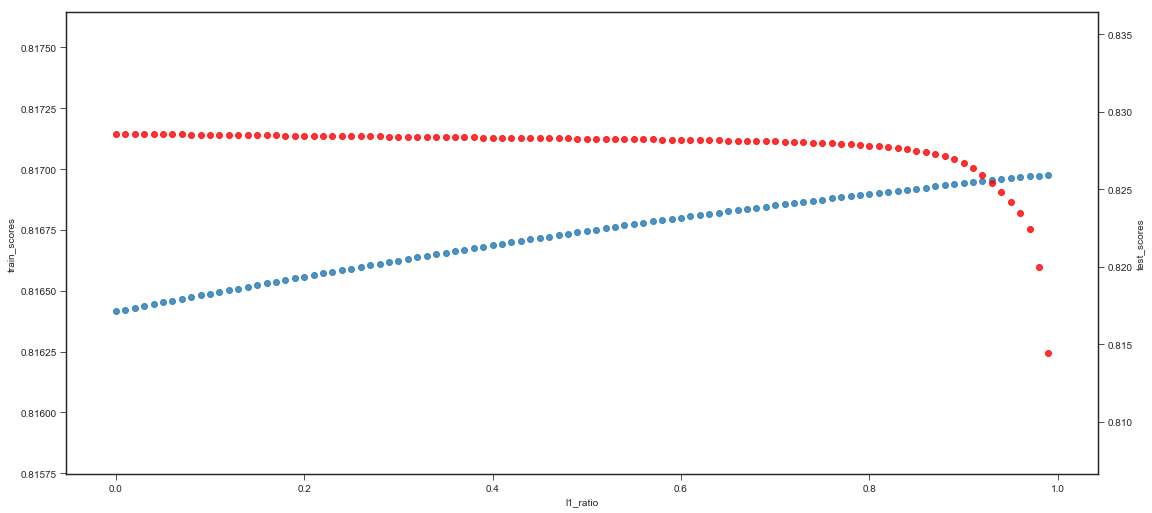

In [23]:
#plotting to find the optimum value of l1 ratio
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 8.5)
sns.regplot(x ='l1_ratio', y='train_scores', data = l1_scores, fit_reg = False, scatter = True)
ax2 = ax.twinx()
sns.regplot(x ='l1_ratio', y='test_scores', data = l1_scores, fit_reg = False, color = 'r', ax = ax2)

The optimum value of l1 ratio can be observed to be 0.85

In [29]:
%%capture
#creating a dataset consisting of test and train scores as columns with alpha bring constant to find optimum l1_ratio
score_train = []
score_val =[]
l1 = []
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
for x in alphas:
    en = linear_model.ElasticNet(alpha = x, l1_ratio = 0.85)
    en.fit(train_X, train_y)
    y_train_pred4 = en.predict(train_X)
    y_test_pred4 = en.predict(val_X)
    l1.append(x)
    score_train.append(metrics.r2_score(train_y,y_train_pred4))
    score_val.append(metrics.r2_score(val_y,y_test_pred4))

df = {'alpha':alphas,'train_scores':score_train,'test_scores':score_val}
l1_scores = pd.DataFrame(data = df)

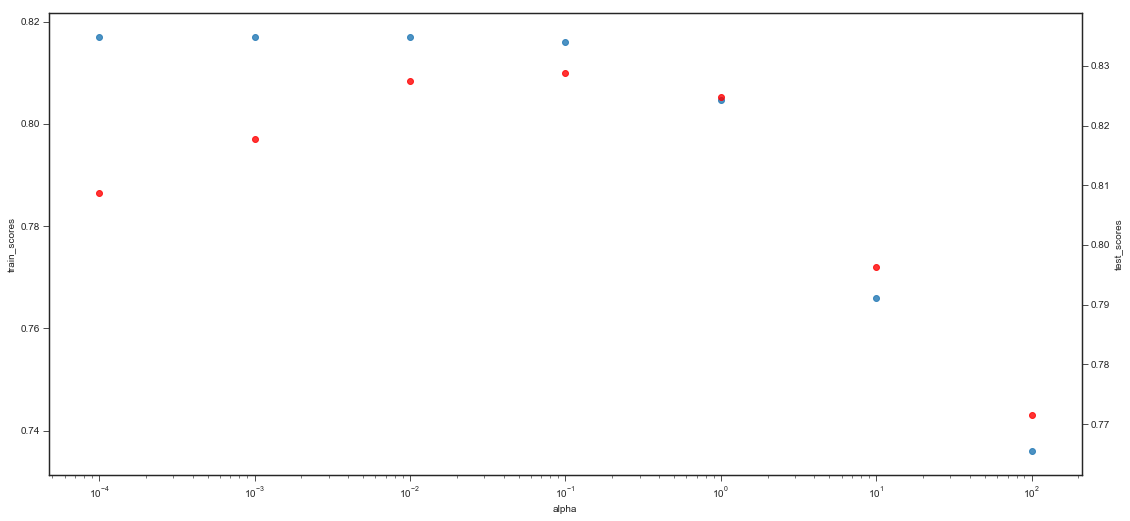

In [30]:
#plotting to find the optimum value of alpha
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots()
ax.set(xscale="log")
fig.set_size_inches(18.5, 8.5)
sns.regplot(x ='alpha', y='train_scores', data = l1_scores, fit_reg = False, scatter = True)
ax2 = ax.twinx()
sns.regplot(x ='alpha', y='test_scores', data = l1_scores, fit_reg = False, color = 'r', ax = ax2)

It is evident that alpha corresponding to maximum of train and test set simultaneously is 0.1 